In [1]:
import matplotlib.pyplot as plt

from buildingenergy.building import InterfaceType, Site, ComponentInterface
from buildingenergy.building import Library, Site, InterfaceType, LayeredInterface
import pandas as pd
import matplotlib.pyplot as plt

Available properties:
- thermal
- Uw_glazing
- glass_transparency
- shading
- solar_absorptivity
- gap_resistance
- ground_reflectance


In [2]:
############## HVAC System_Recovering datas #######################

### Tout
dfTout=pd.read_csv('data/temp_ext.csv', header=0, index_col=0, parse_dates=True)
dfTout=dfTout.resample('1H').mean()
dfTout = dfTout[dfTout.index.year == 2019]
Tout=dfTout['Tout']

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Tout)
# fig.autofmt_xdate()
# plt.ylabel("Tout")
# plt.show()
#print(Tout)


### Treprise
dfTreprise=pd.read_csv('data/temperature_reprise.csv', header=0, index_col=0, parse_dates=True)
dfTreprise=dfTreprise.resample('1H').mean()
dfTreprise = dfTreprise[dfTreprise.index.year == 2019]
Treprise=dfTreprise['Treprise']

#Treprise=Treprise.fillna(Treprise.mean())
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Treprise)
# fig.autofmt_xdate()
# plt.ylabel("Treprise")
# plt.show()

#print(Treprise) 

### Tsouffle
dfTsouffle=pd.read_csv('data/temperature_soufflage.csv', header=0, index_col=0, parse_dates=True)
dfTsouffle=dfTsouffle.resample('1H').mean()
dfTsouffle = dfTsouffle[dfTsouffle.index.year == 2019]
Tsouffle=dfTsouffle['Tsoufflage']

#Treprise=Treprise.fillna(Treprise.mean())
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Tsouffle)
# fig.autofmt_xdate()
# plt.ylabel("Tsouffle")
# plt.show()

#print(Tsouffle)


### debit_air_souffle
dfdebit_air_souffle=pd.read_csv('data/debit_air_souffle.csv', header=0, index_col=0, parse_dates=True)
dfdebit_air_souffle=dfdebit_air_souffle.resample('1H').mean()
dfdebit_air_souffle = dfdebit_air_souffle[dfdebit_air_souffle.index.year == 2019]
Qsouffle=dfdebit_air_souffle['Qsouffle']

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Qsouffle)
# fig.autofmt_xdate()
# plt.ylabel("Qsouffle")
# plt.show()

Qsouffle=Qsouffle.fillna(0)
#print(Qsouffle)

### debit_air_repris
dfdebit_air_repris=pd.read_csv('data/debit_air_repris.csv', header=0, index_col=0, parse_dates=True)
dfdebit_air_repris=dfdebit_air_repris.resample('1H').mean()
dfdebit_air_repris = dfdebit_air_repris[dfdebit_air_repris.index.year == 2019]
Qrepris=dfdebit_air_repris['Qrepris']

# print(Qrepris)

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Qrepris)
# fig.autofmt_xdate()
# plt.ylabel("Qrepris")
# plt.show()


Qrepris=Qrepris.fillna(0)
#print(Qrepris)



In [3]:
################################# Recovering datas of the room ##################

df=pd.read_csv('data/salle_4A020.csv', header=0, index_col=0, parse_dates=True)
df=df.resample('1H').mean()
df=df.tz_localize(None)
df=df[df.index.year == 2019]
#print(df)

## Tarrive
T_arrive=df['T_arrivee_eau']

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(T_arrive)
# fig.autofmt_xdate()
# plt.ylabel("Tarrive")
# plt.show()

T_arrive=T_arrive.fillna(T_arrive.mean())
#print(T_arrive)

## Treturn
T_return=df['T_retour_eau']
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(T_return)
# fig.autofmt_xdate()
# plt.ylabel("Treturn")
# plt.show()

T_return=T_return.fillna(T_return.mean())
#print(T_return)

## Debit_eau
Debit_eau=df['Debit_d_eau']

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Debit_eau)
# fig.autofmt_xdate()
# plt.ylabel("debit_eau")
# plt.show()

Debit_eau=Debit_eau.fillna(0)
#print(Debit_eau)


In [4]:
################# Calculation of thermal resistances ####################

# the library is an excel file named propertiesDB.xls in the data folder
library: Library = Library()
library.store('concrete', 'thermal', 269)  # for instance, it loads the thermal property row 269 in Excel sheet "thermal" and memorize it with the name "concrete"
library.store('glass', 'thermal', 267)
library.store('foam', 'thermal', 260)

Site.library = library

tiny_house: Site = Site('indoor','outdoor')

surface_window: float = 4*2
wall_thickness: float = 0.4
glass_thickness: float = 0.004
air_layer_thickness: float = 0.006
outdoor_wall_surface = 6.7*2.9 - surface_window

wall: LayeredInterface = tiny_house.add_layered_interface('indoor', 'outdoor', InterfaceType.WALL,outdoor_wall_surface)
wall.add_layer('concrete', 30e-2)
wall.add_layer('foam', 10e-2)

window: LayeredInterface = tiny_house.add_layered_interface('indoor', 'outdoor', InterfaceType.GLAZING, surface_window)
window.add_layer('glass', 4e-3)
window.add_layer('air', 8e-3)
window.add_layer('glass', 4e-3)

Rtotal1: float = tiny_house.interface_thermal_resistance('indoor', 'outdoor')
#print('Rtotal1: %fK/W' % (Rtotal1))
#print('Utotal1: %fW/K' % (1/Rtotal1))


Available properties:
- thermal
- Uw_glazing
- glass_transparency
- shading
- solar_absorptivity
- gap_resistance
- ground_reflectance
> get property "conductivity (W/m.K)" for "concrete"
> get property "specific heat capacity (J/kg/K)" for "concrete"
> get property "density (kg/m3)" for "concrete"
> get property "emmisivity coefficient" for "concrete"
> get property "conductivity (W/m.K)" for "glass"
> get property "specific heat capacity (J/kg/K)" for "glass"
> get property "density (kg/m3)" for "glass"
> get property "emmisivity coefficient" for "glass"
> get property "conductivity (W/m.K)" for "polyurethane foam"
> get property "specific heat capacity (J/kg/K)" for "polyurethane foam"
> get property "density (kg/m3)" for "polyurethane foam"
> get property "emmisivity coefficient" for "polyurethane foam"


In [5]:
##################### calculation of Powers ##############################

## Pwater:
C_p= 4180 # capactité thermique eau J/K/kg
Pwater= C_p*Debit_eau*(T_arrive-T_return)*1000/3600

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Pwater)
# fig.autofmt_xdate()
# plt.ylabel("Pwater")
# plt.show()

#print(Pwater)

## Pventilation
C_p_air =1256 # capacité thermique air J/K/m3
P_ventilation = 0.268*C_p_air * (Qsouffle*Tsouffle - Qrepris*Treprise )/3600

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(P_ventilation)
# fig.autofmt_xdate()
# plt.ylabel("P_ventilation")
# plt.show()

P_ventilation=P_ventilation.fillna(0)

#print(P_ventilation)

## Pmetabolism

nb_person=df['Debit_d_eau'] # Debit_d_eau was chosen, but it could be any other feature
nb_person[df.index.year == 2019]=0 # to replace with 0 each value
for i in range(1,365*24,1):
    now = df.index[i] # current date and time
    no = now.weekday()
    int_hour= df.index.hour[i]
    #print(now)
    if (no == 1 or no == 2 or no == 4) and ((int_hour > 7 and int_hour < 12) or (int_hour > 13 and int_hour < 19)) :  # 0 Mon , 2 Wednesday, 4 Friday
        nb_person[i] = 15
    else:  #  1 Tues , 3 Thurs, 5 Sat, 6 Sun  
        nb_person[i] = 0

P_irradiation=df['Debit_d_eau'] # trouver
P_irradiation[df.index.year == 2019]=0
P_metabolism = 100 * nb_person #( P_metabolism = 100 watt for one person)

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(P_metabolism)
# fig.autofmt_xdate()
# plt.ylabel("P_metabolism")
# plt.show()

#print(P_metabolism)


In [6]:
################ Tindoor calculation without capacity effect #########################################
# print(Tout)
# print("separation")
# print(Pwater)

# print(Pwater)

#l'equation:
# equation= Utotal1*(T_out-T_in)+ Utotal2*(T_pipe-Tin) + P_heat_cool + P_metabolism + P_irradiation
Utotal1=1/Rtotal1
#print(Utotal1)
T_in= Tout + (Pwater + P_ventilation + P_metabolism + P_irradiation)/Utotal1

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(T_in)
# fig.autofmt_xdate()
# plt.ylabel("Tin")
# plt.show()

#print('Tin:',T_in)


0.0
0.0


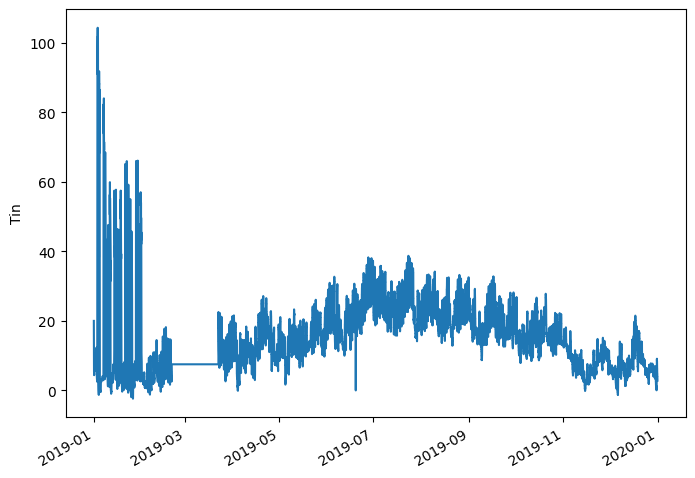

In [7]:
################ Tindoor calculation with capacity #########################################
C_room=C_p_air*2.9*6.7*12
Pwater=Pwater.resample('1s').bfill()

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Pwater)
# fig.autofmt_xdate()
# plt.ylabel("Pwater")
# plt.show()
# print(Pwater)
P_ventilation=P_ventilation.resample('1s').bfill()
P_metabolism=P_metabolism.resample('1s').bfill()
P_irradiation=P_irradiation.resample('1s').bfill()
Tout=Tout.resample('1s').bfill()
T_in= Tout
T_in[0]=20

for i in range (0,24*31*60*60):
    if i==0:
        print(Pwater[i+1])
        print(P_ventilation[i+1])
    T_in[i+1]=T_in[i]+1*(Pwater[i+1] + P_ventilation[i+1] + P_metabolism[i+1] + P_irradiation[i+1])/C_room + Utotal1*(Tout[i+1]-T_in[i])/C_room

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(T_in)
fig.autofmt_xdate()
plt.ylabel("Tin")
plt.show() ##### on diverge complètement parce que le dt est trop grand (1h)

#print('Tin:',T_in)